In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from dataloader import load_data, visualize_images

# Load data and get train_dir
train_generator, test_generator = load_data()

# Obtain train_dir from train_generator
train_dir = train_generator.directory
test_dir = test_generator.directory

2024-04-29 16:31:31.269097: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-29 16:31:31.276465: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 16:31:31.679703: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 16:31:33.218793: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 16:31:35.816319: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Found 202 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [2]:
# Load MobileNetV2 Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

/tmp/ipykernel_46/313030320.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


In [3]:
# Build Trasnfer Learning Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [4]:
# Compile the Model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
# Prepare Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=8,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=8,
        class_mode='binary')

Found 202 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [6]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)

Epoch 1/10


/home/sarahesayas/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 57s 698ms/step - accuracy: 0.7150 - loss: 0.6573 - val_accuracy: 0.5446 - val_loss: 3.1664
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 893ms/step - accuracy: 0.7983 - loss: 0.4006 - val_accuracy: 0.5149 - val_loss: 7.8214
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 670ms/step - accuracy: 0.9109 - loss: 0.3315 - val_accuracy: 0.5000 - val_loss: 3.5612
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 614ms/step - accuracy: 0.8960 - loss: 0.2893 - val_accuracy: 0.5000 - val_loss: 4.0382
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 709ms/step - accuracy: 0.8779 - loss: 0.2932 - val_accuracy: 0.7426 - val_loss: 0.4610
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 690ms/step - accuracy: 0.8682 - loss: 0.3134 - val_accuracy: 0.9010 - val_loss: 0.6384
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 690ms/step - accuracy: 0.9154 - loss: 0.1705 - val_accuracy: 0.5693 - val_loss: 3.9626
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 695ms/step - accuracy: 0.8340 - loss: 0.4955 - val_accuracy: 0.534

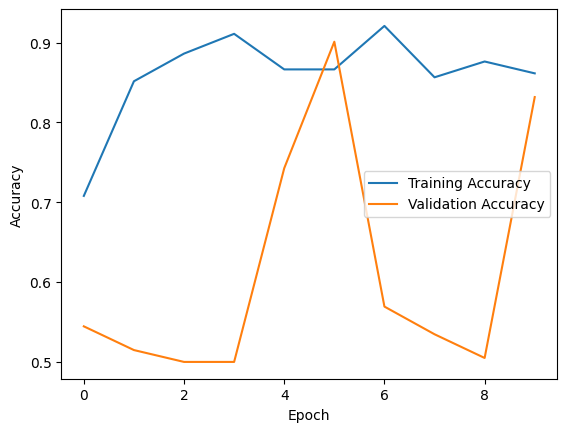

In [8]:
# Learning Curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
model.save("mobilenetV2_model.h5")  # Save the MobileNetV2 model